## KNN 알고리즘 vs K-Means 알고리즘
knn알고리즘은 정답 레이블이 있는 지도 학습에 사용되는 알고리즘이고   
k-means알고리즘은 정답 레이블이 없는 비지도 학습에 사용되는 알고리즘이다

### KNN
1. 회귀, 분류 둘 다 가능
2. 정말 간단한 거리 기반의 알고리즘   
3. 정답 레이블이 있는 지도 학습에 사용
4. K는 새로운 값을 기준으로 가장 가까운 데이터를 몇개까지 체크할지를 정하는 파라미터이다

### 거리 공식
1. 유클리드 거리: √{(a1-b1)^2 + ....... + (an-bn)^2}
2. 맨하튼 거리: |a1-b1| + ...... + |an-b2|

## KNN --> K-최근접 이웃 회귀(K-Nearest Neighbors)
1. 거리 기반으로 진행한다
2. 거리 기반에서 가장 가까운 k개 이웃을 찾고 K개 정답의 평균을 계산해서 예측한다
3. 그러나 평균으로 잡게 되면 예측 정확도가 떨어질 수 있다(거리의 차이가 있을 수 있ㄱ ㅣ때문)
4. 따라서 가중치를 이용해서 거리가 가까울수록 더 데이터가 유사할 것이라 보고 가중치 부여

In [5]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 새로운 데이터 값의 3개의 기준의 평점이 아래와 같으면 아래의 평균으로 대체
(5.0 + 7.0 + 9.5) / 3

7.166666666666667

In [3]:
# 가중치를 부여하여 거리가 가까울수록 예측에 높기 반영될 수 있도록 활용하면 다음과 같은 예측값이 나온다
#    평점      거리
# A  5.0       3.2
# B  7.0       10.5
# C  9.5       1.1
(5.0/3.2 + 7.0/10.5 + 9.5/1.1) / (1/3.2 + 1/10.5 + 1/1.1)

8.25128415861927

### KNN의 한계
거리기반이다보니 기존에 학습할 데이터에서 벗어난 범위들은 정확하게 예측하기 어렵다

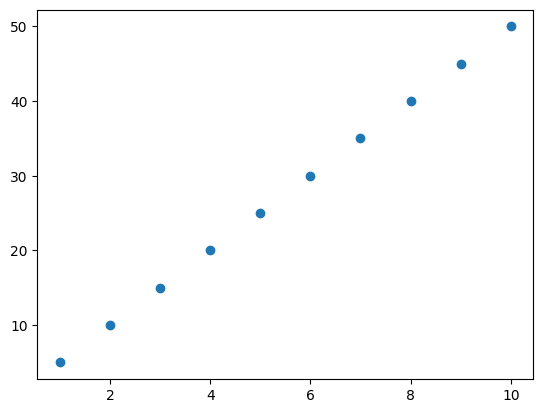

In [6]:
x = np.arange(1,11).reshape(-1,1)
y = np.arange(1,11) * 5
plt.figure()
plt.scatter(x,y)
plt.show()

In [8]:
knn_re = KNeighborsRegressor(n_neighbors=2).fit(x, y)
print(knn_re.predict([[7]]))

[32.5]


In [9]:
knn_re

KNeighborsRegressor(n_neighbors=2)

In [12]:
# 값이 넘어가도 거리기반이기 때문에 동일한 값들이 나오게 된다
# k=2이기 때문에 50, 45가 골라져서 그 평균인 47.5로 값이 도출되는 것이다
print(knn_re.predict([[10]])) 
print(knn_re.predict([[15]])) 
print(knn_re.predict([[100]]))

[47.5]
[47.5]
[47.5]


### KNN - 파라미터 정리하기
1. n_neighbors : 이웃의 개수
2. weight : 가중 평균 개념(uniform이 default)
3. algorithm : 차원이 많아지면 데이터를 탐색하는데 오래 걸리므로 데이터를 탐색하는 방법을 설정   
    ex) ball_tree, kd_tree, brute
4. metrics : p=1 맨하탄, p=2 유클리디안, p=3 체비쇼프 거리 기반 (default는 p=2)
5. n_jobs : 사용할 cpu 개수 - 1을 default로

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

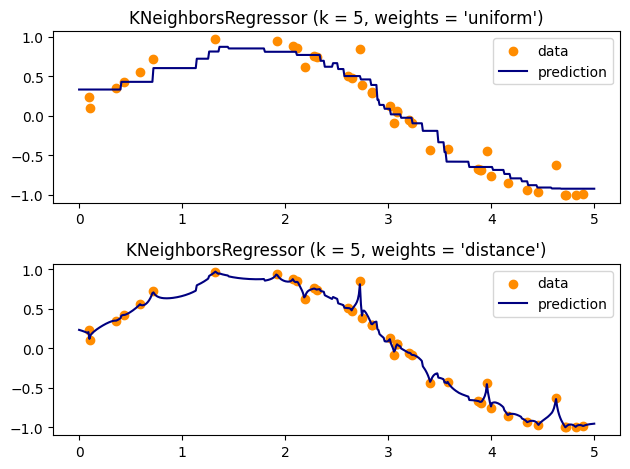

In [2]:
# weight(가중평균)을 어떤 값으로 하느냐에 따른 오차를 그래프로 출력

n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

## 캘리포니아 집값 데이터로 실습

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

dataset = datasets.fetch_california_housing() #캘리포니아 데이터 로드
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) # 데이터 프레임화
df['target'] = dataset.target # 타겟 열 추가

data = df[['MedInc','HouseAge']]
target = df['target']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=111)

In [5]:
rmse_val = []
for K in range(150):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)
print(min(rmse_val))

Rmse  1 = 1.0950482374478512
Rmse  2 = 0.9471974468349912
Rmse  3 = 0.8879375003120225
Rmse  4 = 0.8636956739862284
Rmse  5 = 0.8436155519539745
Rmse  6 = 0.8370594431695786
Rmse  7 = 0.8287384929373307
Rmse  8 = 0.8230440440092522
Rmse  9 = 0.8199171785754918
Rmse  10 = 0.8180190731547325
Rmse  11 = 0.816790146747719
Rmse  12 = 0.81326537423605
Rmse  13 = 0.8119930848951583
Rmse  14 = 0.8092128005372782
Rmse  15 = 0.8089449718087569
Rmse  16 = 0.8059648036724631
Rmse  17 = 0.8050733951213693
Rmse  18 = 0.8032791601507158
Rmse  19 = 0.8018940211578898
Rmse  20 = 0.8010276695683639
Rmse  21 = 0.8009482651267855
Rmse  22 = 0.8000453653570154
Rmse  23 = 0.7998504570654704
Rmse  24 = 0.7992982748266572
Rmse  25 = 0.7986115022125524
Rmse  26 = 0.7982873832114445
Rmse  27 = 0.7967968683618842
Rmse  28 = 0.796679233190677
Rmse  29 = 0.7962155423750112
Rmse  30 = 0.7960842205674209
Rmse  31 = 0.795336172967995
Rmse  32 = 0.7951299661087289
Rmse  33 = 0.7948311433545254
Rmse  34 = 0.79457206664

<Axes: >

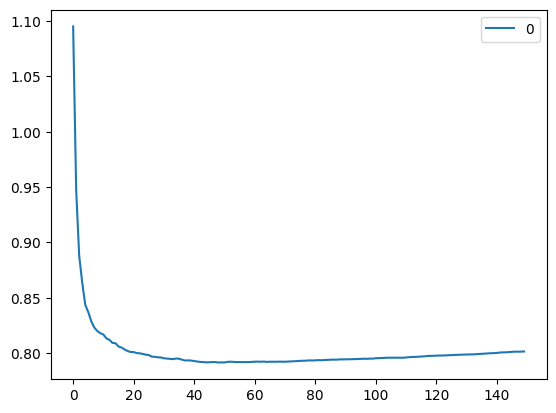

In [6]:
curve1 = pd.DataFrame(rmse_val)
curve1.plot()
# 이웃을 150개 이상잡고 숫자가 계속 커지면 -> 평균으로 회귀하는 것 평균에 대해서 결국 값을 대체하게 되는 것이니 전체 평균으로 점점 가지고 가게 되는 것

In [7]:
rmse_val = []
for K in range(150):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)

Rmse  1 = 1.0950482374478512
Rmse  2 = 0.9896854784726925
Rmse  3 = 0.9483881577558474
Rmse  4 = 0.9292385156028214
Rmse  5 = 0.9153332735153442
Rmse  6 = 0.9074668452301325
Rmse  7 = 0.9001510105671994
Rmse  8 = 0.8951428552431373
Rmse  9 = 0.891755631086425
Rmse  10 = 0.8886916158776763
Rmse  11 = 0.8859873925564149
Rmse  12 = 0.8832376921375675
Rmse  13 = 0.8813763978132424
Rmse  14 = 0.8791259159709399
Rmse  15 = 0.8777917281895559
Rmse  16 = 0.8757705897470889
Rmse  17 = 0.8743940317323988
Rmse  18 = 0.8730574257928958
Rmse  19 = 0.8718387941811685
Rmse  20 = 0.8708708057188951
Rmse  21 = 0.8700838747983802
Rmse  22 = 0.8691318628359496
Rmse  23 = 0.8684007871838284
Rmse  24 = 0.8676525839717111
Rmse  25 = 0.8667963065856223
Rmse  26 = 0.8660860080569368
Rmse  27 = 0.8651143498345747
Rmse  28 = 0.8645487766718303
Rmse  29 = 0.8638570640438897
Rmse  30 = 0.8632580755057184
Rmse  31 = 0.8626547190296254
Rmse  32 = 0.8621183900405842
Rmse  33 = 0.8615638296177389
Rmse  34 = 0.8611126

<Axes: >

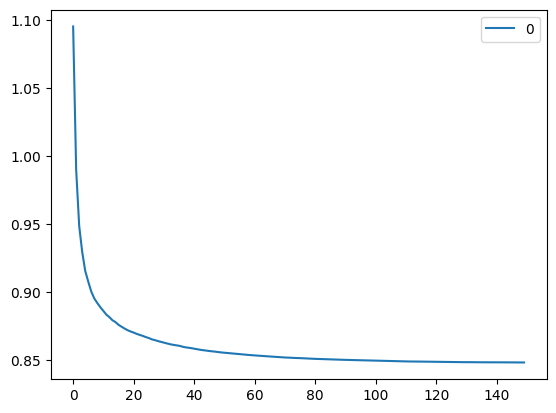

In [8]:
curve2 = pd.DataFrame(rmse_val)
curve2.plot()

In [9]:
rmse_val = []
for K in range(150):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance',p=1)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)

Rmse  1 = 1.0964470357501235
Rmse  2 = 0.9896802249863503
Rmse  3 = 0.9484484782049668
Rmse  4 = 0.929375536548149
Rmse  5 = 0.9152605121477724
Rmse  6 = 0.9074877102074799
Rmse  7 = 0.9003023271933578
Rmse  8 = 0.8952548914288612
Rmse  9 = 0.8918340282279743
Rmse  10 = 0.8887685384660193
Rmse  11 = 0.8861045397996767
Rmse  12 = 0.8834374429175941
Rmse  13 = 0.8815464278673592
Rmse  14 = 0.8792586527499465
Rmse  15 = 0.8778936244050152
Rmse  16 = 0.8759784892407461
Rmse  17 = 0.8745780679418466
Rmse  18 = 0.8733187079844421
Rmse  19 = 0.8720091893274603
Rmse  20 = 0.8710055557900998
Rmse  21 = 0.8702947087455656
Rmse  22 = 0.8693007308211771
Rmse  23 = 0.868583204865987
Rmse  24 = 0.8678467575585336
Rmse  25 = 0.8669966493863285
Rmse  26 = 0.8663562077434545
Rmse  27 = 0.8653221587728813
Rmse  28 = 0.8647834428647361
Rmse  29 = 0.8641051541446393
Rmse  30 = 0.8636637501750546
Rmse  31 = 0.8630837969278051
Rmse  32 = 0.8625167200144688
Rmse  33 = 0.8619918014260913
Rmse  34 = 0.86157162

<Axes: >

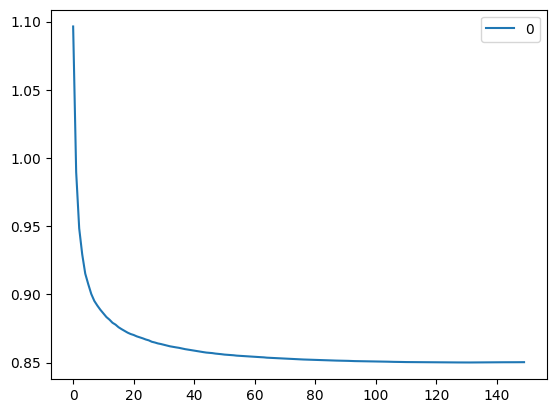

In [10]:
curve3 = pd.DataFrame(rmse_val)
curve3.plot()

### 결국에는 K값을 어떤 값으로 지정하는 게 가장 좋은 것인가?
- 그럼 KNN 모델을 통해서 단순하게 최소의 RMSE 나온 것이 가장 뛰어난 모델이라고 말할 수 있는가?
- KNN 이웃수 50개 이상으로 해서 최적의 모델을 도출했습니다!